In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path = "drive/My Drive/_data/"
!ls "drive/My Drive/_data/"

Mounted at /content/drive
kddcup.data_10_percent	kddcup.names


In [ ]:
# !cd "drive/My Drive/msFardin/_data/" && gunzip kddcup.data_10_percent.gz


drive  sample_data


In [ ]:
import pandas as pd
import numpy as np
import os
from datetime import datetime 

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline


import sys
sys.path.append('drive/My Drive/msFardin')


try:
  import feyn
except:
  !pip install feyn==1.3.3
  import feyn

In [4]:
# ['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
  # 'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
  # 'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
  # 'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
  # 'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
  # 'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
  # 'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
  # 'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
  # 'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
  # 'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i']       


selected_service = ['smtp', 'http']
feature_mode = 2 #2 or  1


with open(data_path+'kddcup.names', 'r') as infile:
    kdd_names = infile.readlines()
    kdd_cols = [x.split(':')[0] for x in kdd_names[1:]]

kdd_cols.append('Class')
data_file = data_path + "kddcup.data_10_percent"
main_df = pd.read_csv(data_file, names = kdd_cols, header=None)
print(len(main_df))
print(len(main_df.columns))
print(main_df.columns)
main_df.head()
# main_df.service.unique()


494021
42
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Class'],
      dtype='object')


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


#Data Stream

In [7]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

print("1:main_df.shape=>",main_df.shape)
df = main_df.loc[main_df['service'].isin(selected_service),:] 
print("2:df.shape=>",df.shape)
df = df.dropna() 
print("3:df.shape=>",df.shape)


if feature_mode==1:
    selected_column = ['duration','flag','src_bytes',
                      'dst_bytes','logged_in','count',
                      'srv_count','srv_diff_host_rate','dst_host_count',
                      'dst_host_srv_count','dst_host_same_src_port_rate','Class']
else:
    selected_column = []
    for col in df.columns[:-1]:
        if len(df[col].unique())>1:
              selected_column.append(col)

    selected_column.append('Class')

df = df[selected_column]

types = {}
for var in df.columns[:-1]:
    if df[var].dtype == 'object':
        types[var] = 'categorical'

# for col in df.columns[:-1]:
#     if df[col].dtype == 'object':
#         df[col] = (pd.factorize(df[col],sort=True)[0]).astype(np.int)
# # print(df.dtypes)


from collections import Counter
print('Labels=>',df.Class.unique())
print('Labels Histogram=>',Counter(df.Class))


df.Class[df.Class!='normal.']='1'
df.Class[df.Class=='normal.']='0'
print('Binary Labels Histogram=>',Counter(df.Class))

df.Class=df.Class.astype(np.int)

train = df.iloc[:int(len(df)*0.7),:]
test = df.iloc[int(len(df)*0.7):,:]

print("Train.samples=>",len(train))
print("Test.shape=>",len(test))


# x_train=train.drop(['Class'],axis=1)
# y_train=train['Class']

# x_test=test.drop(['Class'],axis=1)
# y_test=test['Class']

# print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
# print((y_test==1).sum())
# print((y_test==0).sum())

# x_test = pd.concat([x_train,x_test])
# y_test = pd.concat([y_train,y_test])


1:main_df.shape=> (494021, 42)
2:df.shape=> (74016, 42)
3:df.shape=> (74016, 42)
Labels=> ['normal.' 'ipsweep.' 'back.' 'phf.' 'neptune.' 'portsweep.' 'satan.']
Labels Histogram=> Counter({'normal.': 71484, 'back.': 2203, 'neptune.': 312, 'portsweep.': 5, 'ipsweep.': 4, 'phf.': 4, 'satan.': 4})
Binary Labels Histogram=> Counter({'0': 71484, '1': 2532})
Train.samples=> 51811
Test.shape=> 22205
(51811, 32) (51811,) (22205, 32) (22205,)
479
21726


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#QLattice on Data Stream

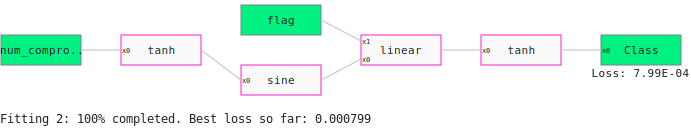

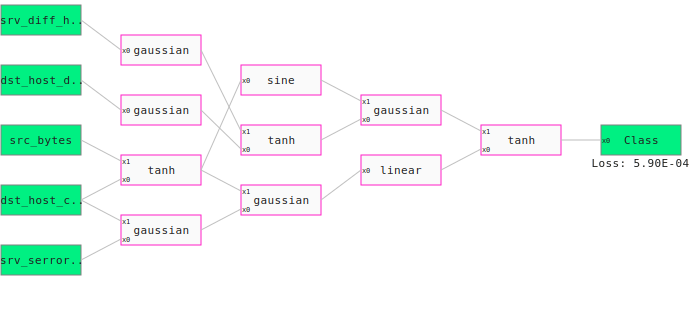

In [25]:
# url = "<URL to your qlattice>", api_token="<Your API token>"
ql = feyn.QLattice(url="https://qlattice.abzu.ai/qlattice-5ee40fc0",
                   api_token="1132a32ab0ef4b3e8cb6fa4fa4616c91")

ql.reset()

target = 'Class'

qgraph = ql.get_qgraph(train.columns, target, max_depth=4, stypes=types) 
# qgraph.head(3)


# Defining the number of loops/updates and epochs
nloops = 1
nepochs = 2

# And training finally begins
for _epoch in range(nepochs):
    for loop in range(nloops): 
        qgraph.fit(train, 
                  loss_function='squared_error', 
                  threads=8, show='graph') 
        _train = resample(train, 
                replace=False,    # sample without replacement
                n_samples=5000,     # to match minority class
                random_state=123) # reproducible results

        best = qgraph.sort(_train, loss_function='squared_error')[0] 
        
        ql.update(best) 

qgraph.head(1)


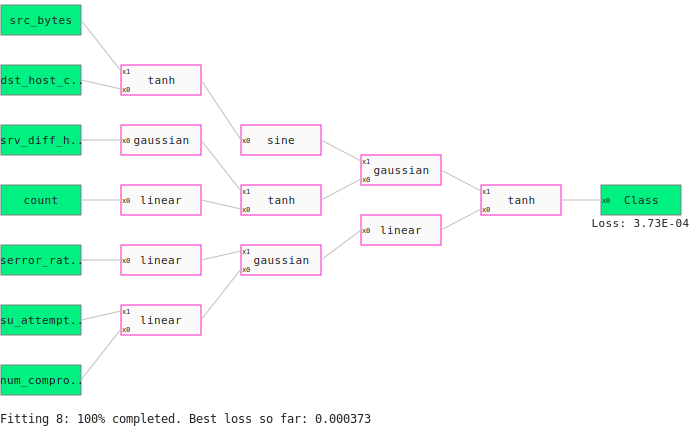

Confusion matrix(test):
[[21712    14]
 [   30   449]]
Accuracy 0.9980184643098401
Precision 0.9697624190064795
Recall 0.9373695198329853


In [26]:
best = qgraph.sort(_train, loss_function='squared_error')[0]
_batch_size = 4096

res_Class = []

new_train = train.copy()
for idx in range(0,len(test),_batch_size):

    i_min = idx
    i_max = idx + _batch_size
    i_max = np.min([i_max,len(x_test)])
    # print(i_min,i_max)
    data_batch = test.iloc[i_min:i_max,:]
    res_Class.extend(best.predict(data_batch))

    new_train = resample(new_train, 
                replace=False,    # sample without replacement
                n_samples=5000,     
                random_state=123) # reproducible results

    new_train = pd.concat([new_train, data_batch])
    qgraph.fit(new_train, 
          loss_function='squared_error', 
          threads=8, show='graph')
    best = qgraph.sort(new_train, loss_function='squared_error')[0]        
    ql.update(best)


res_Class =  np.array(res_Class)

threshold = 0.5
y_pred = np.where(res_Class > threshold, True, False)
y_true = test[target].astype(bool)

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
Accuracy = (tp + tn) / (tp + fp + fn + tn)
ACC = Accuracy.sum()
print('Confusion matrix(test):\n{}'.format(confusion_matrix(y_true, y_pred)))
print("Accuracy", ACC)
Precision = tp/(tp+fp)
print("Precision", Precision)
Recall = tp/(tp+fn)
print("Recall",Recall)

#QLattice

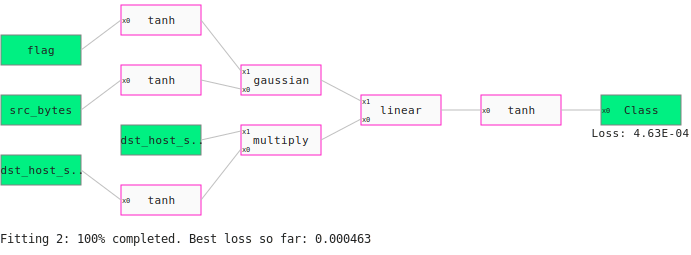

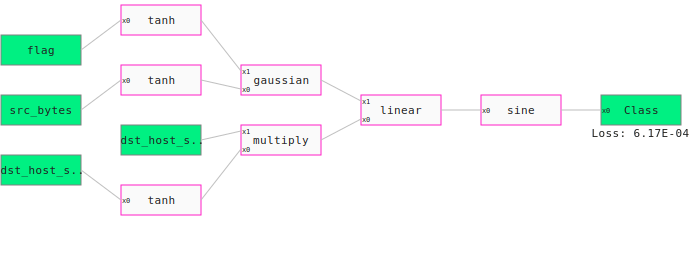

In [23]:
# url = "<URL to your qlattice>", api_token="<Your API token>"
ql = feyn.QLattice(url="https://qlattice.abzu.ai/qlattice-5ee40fc0",
                   api_token="1132a32ab0ef4b3e8cb6fa4fa4616c91")

ql.reset()

target = 'Class'

qgraph = ql.get_qgraph(train.columns, target, max_depth=4, stypes=types) 
# qgraph.head(3)


# Defining the number of loops/updates and epochs
nloops = 1
nepochs = 2

# And training finally begins
for _epoch in range(nepochs):
    for loop in range(nloops): 
        qgraph.fit(train, 
                  loss_function='squared_error', 
                  threads=8, show='graph') 
        _train = resample(train, 
                replace=False,    # sample without replacement
                n_samples=5000,     # to match minority class
                random_state=123) # reproducible results

        best = qgraph.sort(_train, loss_function='squared_error')[0] 
        
        ql.update(best) 

qgraph.head(1)


In [24]:
best = qgraph.sort(_train, loss_function='squared_error')[0]

res_Class = best.predict(test)

threshold = 0.5
y_pred = np.where(res_Class > threshold, True, False)
y_true = test[target].astype(bool)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
Accuracy = (tp + tn) / (tp + fp + fn + tn)
ACC = Accuracy
print('Confusion matrix(test):\n{}'.format(confusion_matrix(y_true, y_pred)))
print("Accuracy", ACC)
Precision = tp/(tp+fp)
print("Precision", Precision)
Recall = tp/(tp+fn)
print("Recall",Recall)

Confusion matrix(test):
[[21716    10]
 [  119   360]]
Accuracy 0.9941904976356677
Precision 0.972972972972973
Recall 0.7515657620041754
